In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib as mpl
sns.set()
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./data/CDNOW.txt",sep="\s+",names=["id","time","nums","money"])

In [3]:
data

,id,time,nums,money
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
5,3,19970402,2,19.54
6,3,19971115,5,57.45
7,3,19971125,4,20.96
8,3,19980528,1,16.99
9,4,19970101,2,29.33


看一下数据的整体描述

In [4]:
data.describe()

,id,time,nums,money
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
id       69659 non-null int64
time     69659 non-null int64
nums     69659 non-null int64
money    69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


可以看出没有缺失值

In [6]:
data.nunique().sort_values()

nums        45
time       546
money     8209
id       23570
dtype: int64

可以看出这里提供的特征都不是唯一的

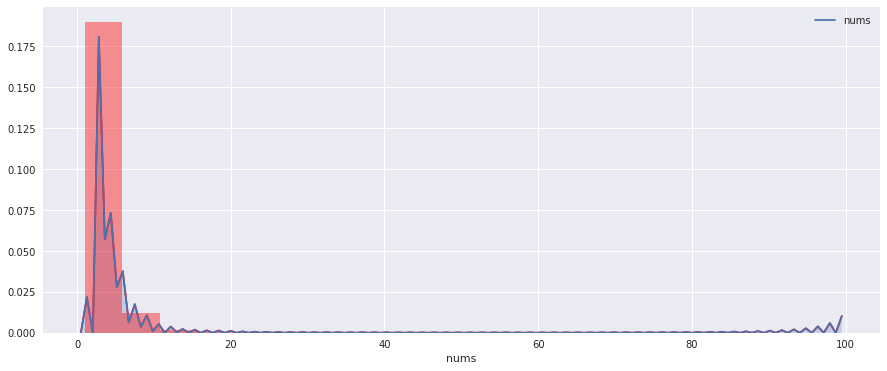

In [7]:
plt.subplots(figsize=(15, 6))
sns.distplot(data["nums"], bins=20, color='r')
sns.kdeplot(data["nums"], shade=True,)

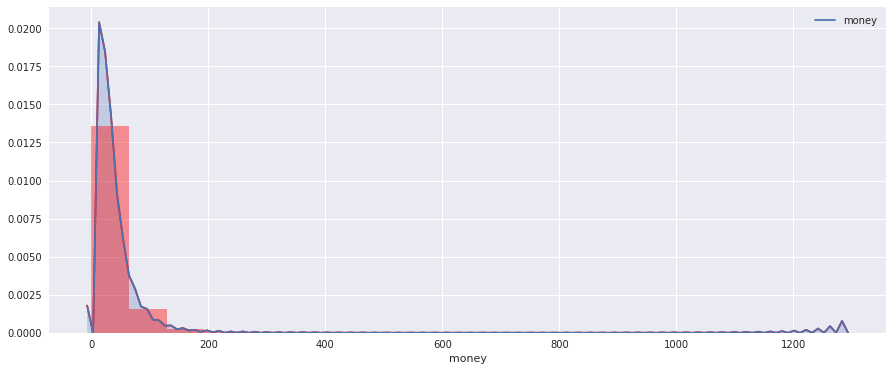

In [31]:
plt.subplots(figsize=(15, 6))
sns.distplot(data["money"], bins=20, color='r')
sns.kdeplot(data["money"], shade=True,)

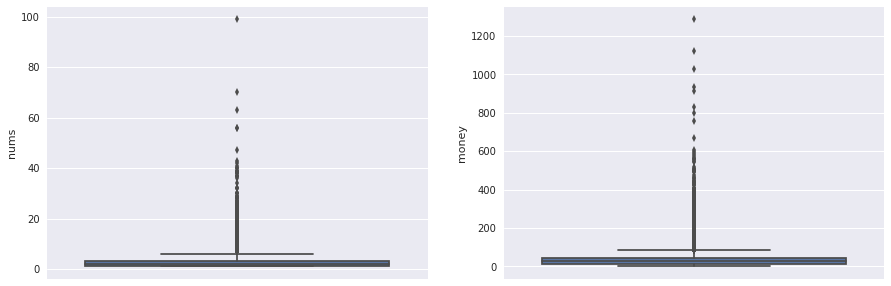

In [35]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(y=data["nums"],ax=ax1)
sns.boxplot(y=data["money"],ax=ax2)
plt.show()

KeyboardInterrupt: 

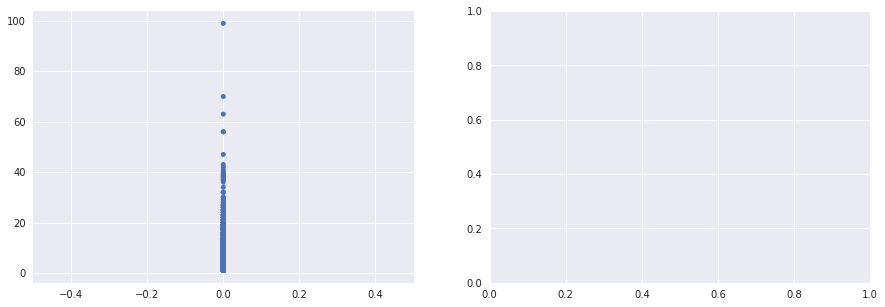

In [39]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
sns.swarmplot(y=data["nums"],ax=ax1)
sns.swarmplot(y=data["money"],ax=ax2)
plt.show()

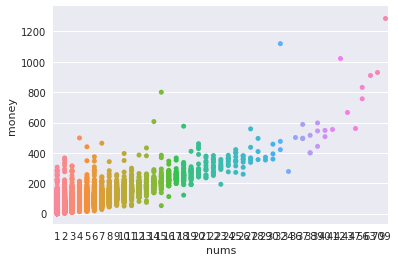

In [40]:
sns.stripplot(x="nums", y="money", data=data)

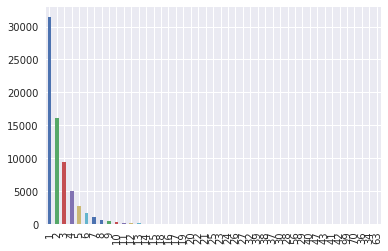

In [8]:
data["nums"].value_counts().plot(kind="bar")

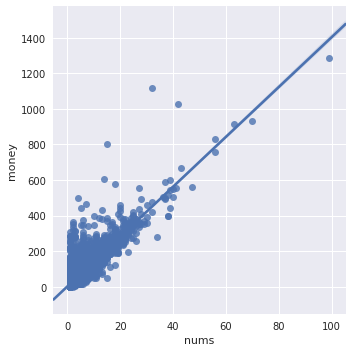

In [9]:
sns.lmplot(x="nums", y="money", data=data)

从这个图可以看出，money跟nums是符合线性关系的

In [10]:
data.groupby("id")["nums"].mean()

id
1         1.000000
2         3.000000
3         2.666667
4         1.750000
5         2.636364
6         1.000000
7         6.000000
8         2.250000
9         2.000000
10        3.000000
11        1.000000
12        4.000000
13        4.000000
14        2.000000
15        4.000000
16        2.000000
17        5.000000
18        1.000000
19        5.500000
20       23.000000
21        2.000000
22        1.000000
23        2.000000
24        2.000000
25        1.500000
26        3.000000
27        5.000000
28        2.333333
29        2.333333
30        1.000000
           ...    
23541     1.000000
23542     5.000000
23543     2.000000
23544     4.000000
23545     1.000000
23546     1.000000
23547     1.000000
23548     2.000000
23549     2.000000
23550     2.000000
23551     2.000000
23552     2.000000
23553     4.000000
23554     1.500000
23555     2.800000
23556     2.142857
23557     1.000000
23558     2.750000
23559     2.666667
23560     1.000000
23561     2.000000
23562    

In [11]:
data.groupby("id").size()

id
1         1
2         2
3         6
4         4
5        11
6         1
7         3
8         8
9         3
10        1
11        4
12        1
13        1
14        1
15        1
16        4
17        1
18        1
19        2
20        2
21        2
22        1
23        1
24        2
25        8
26        2
27        2
28        3
29       12
30        2
         ..
23541     2
23542     1
23543     1
23544     3
23545     1
23546     1
23547     2
23548     1
23549     1
23550     1
23551     6
23552     2
23553     2
23554     2
23555     5
23556     7
23557     1
23558     4
23559     3
23560     1
23561     3
23562     1
23563     2
23564     3
23565     1
23566     1
23567     1
23568     3
23569     1
23570     2
Length: 23570, dtype: int64

这个可以求的用户买东西的频率，可以针对经常去买东西用户做推广

In [12]:
data.groupby("id")["nums"].max()

id
1         1
2         5
3         5
4         2
5         4
6         1
7         9
8         7
9         2
10        3
11        1
12        4
13        4
14        2
15        4
16        4
17        5
18        1
19       10
20       27
21        3
22        1
23        2
24        3
25        3
26        3
27        6
28        3
29        4
30        1
         ..
23541     1
23542     5
23543     2
23544     5
23545     1
23546     1
23547     1
23548     2
23549     2
23550     2
23551     4
23552     2
23553     4
23554     2
23555     4
23556     3
23557     1
23558     4
23559     3
23560     1
23561     3
23562     2
23563     2
23564     3
23565     1
23566     2
23567     1
23568     4
23569     2
23570     3
Name: nums, Length: 23570, dtype: int64

还可以求std skew等，基本的统计操作是特征工程必备的

同时还可以对money进行基础统计

In [13]:
data.groupby("id")["money"].max()

id
1         11.77
2         77.00
3         57.45
4         29.73
5         46.46
6         20.99
7        138.50
8         50.43
9         41.98
10        39.31
11        19.30
12        57.06
13        72.94
14        29.92
15        52.87
16        31.60
17        73.22
18        14.96
19       163.35
20       363.60
21        63.34
22        14.37
23        24.74
24        47.28
25        24.98
26        59.97
27        83.41
28        39.51
29        67.31
30        14.37
          ...  
23541     46.37
23542     77.43
23543     50.76
23544     48.68
23545     24.99
23546     13.97
23547     11.77
23548     23.54
23549     27.13
23550     25.28
23551    102.36
23552     26.93
23553     49.30
23554     24.60
23555     49.96
23556     45.74
23557     14.37
23558     48.22
23559     52.80
23560     18.36
23561     37.05
23562     29.33
23563     47.98
23564     46.47
23565     11.77
23566     36.00
23567     20.97
23568     83.74
23569     25.74
23570     51.12
Name: money, Length: 

In [14]:
data["per_money"] = data["money"]/data["nums"]

In [15]:
data

,id,time,nums,money,per_money
0,1,19970101,1,11.77,11.770000
1,2,19970112,1,12.00,12.000000
2,2,19970112,5,77.00,15.400000
3,3,19970102,2,20.76,10.380000
4,3,19970330,2,20.76,10.380000
5,3,19970402,2,19.54,9.770000
6,3,19971115,5,57.45,11.490000
7,3,19971125,4,20.96,5.240000
8,3,19980528,1,16.99,16.990000
9,4,19970101,2,29.33,14.665000


In [ ]:
从数据上还可以观察到有的用户，有的时候用户在当天去买东西的次数不止一次，这样判断